In [179]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE






## DataFrame erstellen

In [165]:
import chromadb
import pandas as pd

client = chromadb.PersistentClient(path="../VektorDB2")
collection = client.get_collection("VektorDB2")
data = collection.get(include=["embeddings", "metadatas", "documents"])

#.
df2 = pd.DataFrame({
    'id': data['ids'],
    'text': data['documents'],
    'embedding': [list(emb) for emb in data['embeddings']],
    

    'gesetz': [m.get('gesetz') or m.get('law') or 'Unbekannt' for m in data['metadatas']],
    
    'label': [m.get('label', '') for m in data['metadatas']],
    'paragraph': [m.get('paragraph', '') for m in data['metadatas']]
})
df2.head()


,id,text,embedding,gesetz,label,paragraph
0,AGG_0,AGG Präambel/Allgemein: Allgemeines Gleichbeha...,"[0.014303729869425297, -0.09027136117219925, 0...",AGG,AGG Präambel/Allgemein,Präambel/Allgemein
1,AGG_1,AGG Präambel/Allgemein: Benachteiligungen aus ...,"[-0.05146289989352226, -0.034151870757341385, ...",AGG,AGG Präambel/Allgemein,Präambel/Allgemein
2,AGG_2,AGG § 1 (Teil 1): genannten Grund sind nach Ma...,"[-0.02275240048766136, -0.03822503983974457, -...",AGG,AGG § 1 (Teil 1),§ 1
3,AGG_3,AGG § 1 (Teil 2): eßlich der Inanspruchnahme d...,"[-0.040936581790447235, 0.03495335951447487, 0...",AGG,AGG § 1 (Teil 2),§ 1
4,AGG_4,AGG § 1: Für Leistungen nach dem Sozialgesetzb...,"[-0.0775250792503357, 0.08246596157550812, 0.0...",AGG,AGG § 1,§ 1


In [166]:
print(df2['gesetz'].value_counts().head()) 

gesetz
BetrVG    654
AGG       174
ArbzG     173
MiLoG     137
KSchG     123
Name: count, dtype: int64


In [167]:
df2.isnull().sum()

id           0
text         0
embedding    0
gesetz       0
label        0
paragraph    0
dtype: int64

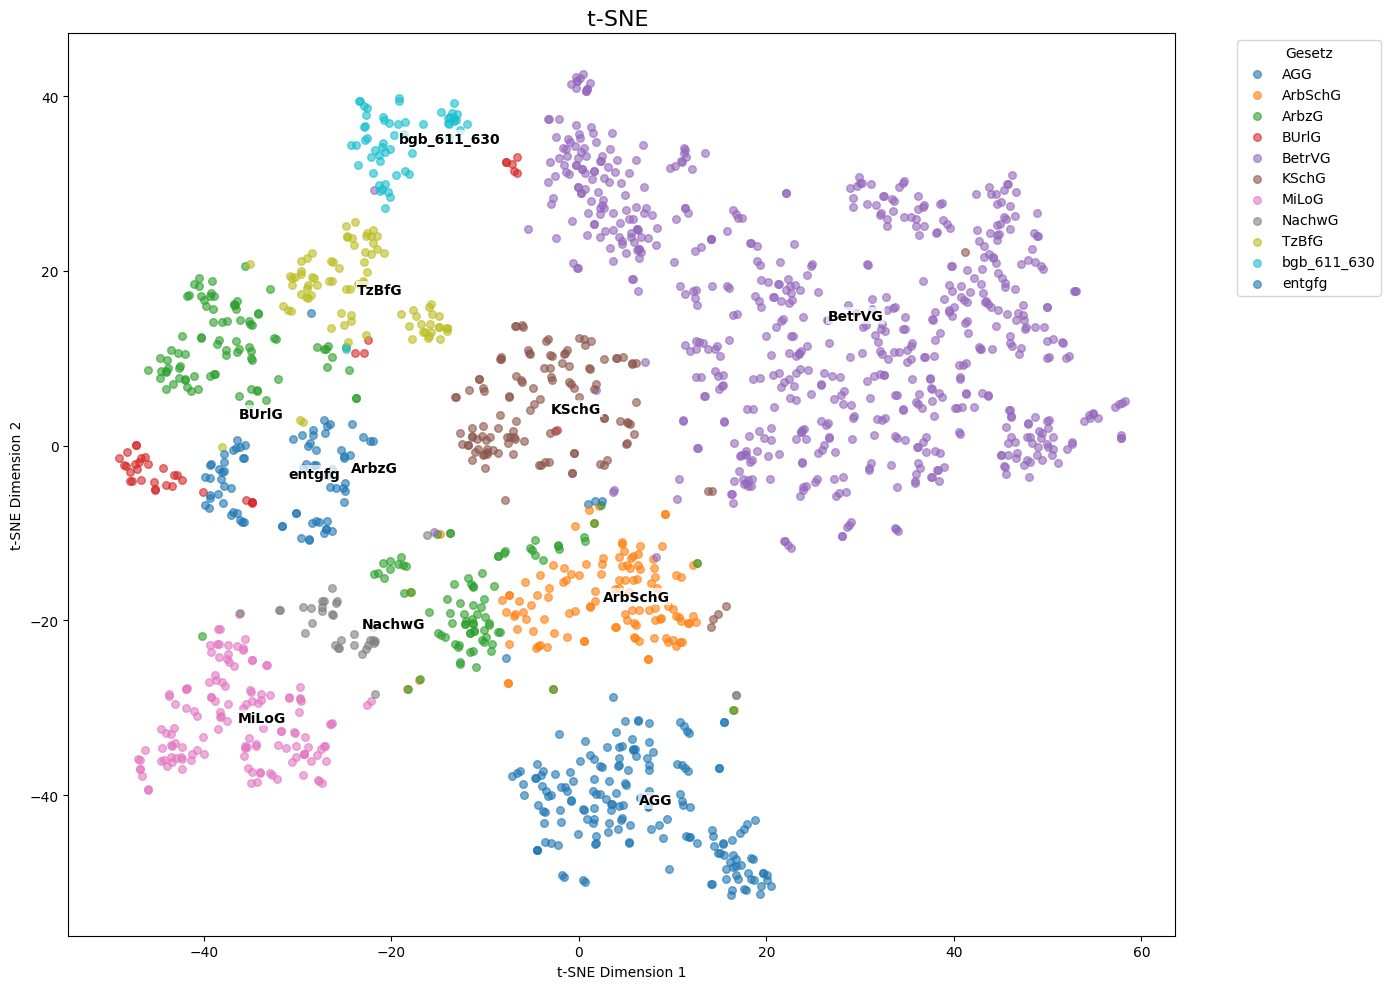

In [168]:


# 1. Daten vorbereiten 
embeddings_matrix = np.array(df2['embedding'].tolist())

# 2. t-SNE berechnen
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings_matrix)

df2['tsne_x'] = embeddings_2d[:, 0]
df2['tsne_y'] = embeddings_2d[:, 1]

# 3. Visualisierung
plt.figure(figsize=(14, 10))

groups = df2.groupby('gesetz')

for name, group in groups:
    plt.scatter(group['tsne_x'], group['tsne_y'], 
                label=name,       
                alpha=0.6, 
                s=30)             

#  im mean beschriften
for name, group in groups:
    # Berechne die Mitte der Wolke
    center_x = group['tsne_x'].mean()
    center_y = group['tsne_y'].mean()
    
    plt.text(center_x, center_y, 
             name, 
             fontsize=10, 
             fontweight='bold', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

plt.title('t-SNE ', fontsize=16)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')


plt.legend(title="Gesetz", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/Users/perezopoku/Desktop/Programme/Persönlcihe Projekte/RAG/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


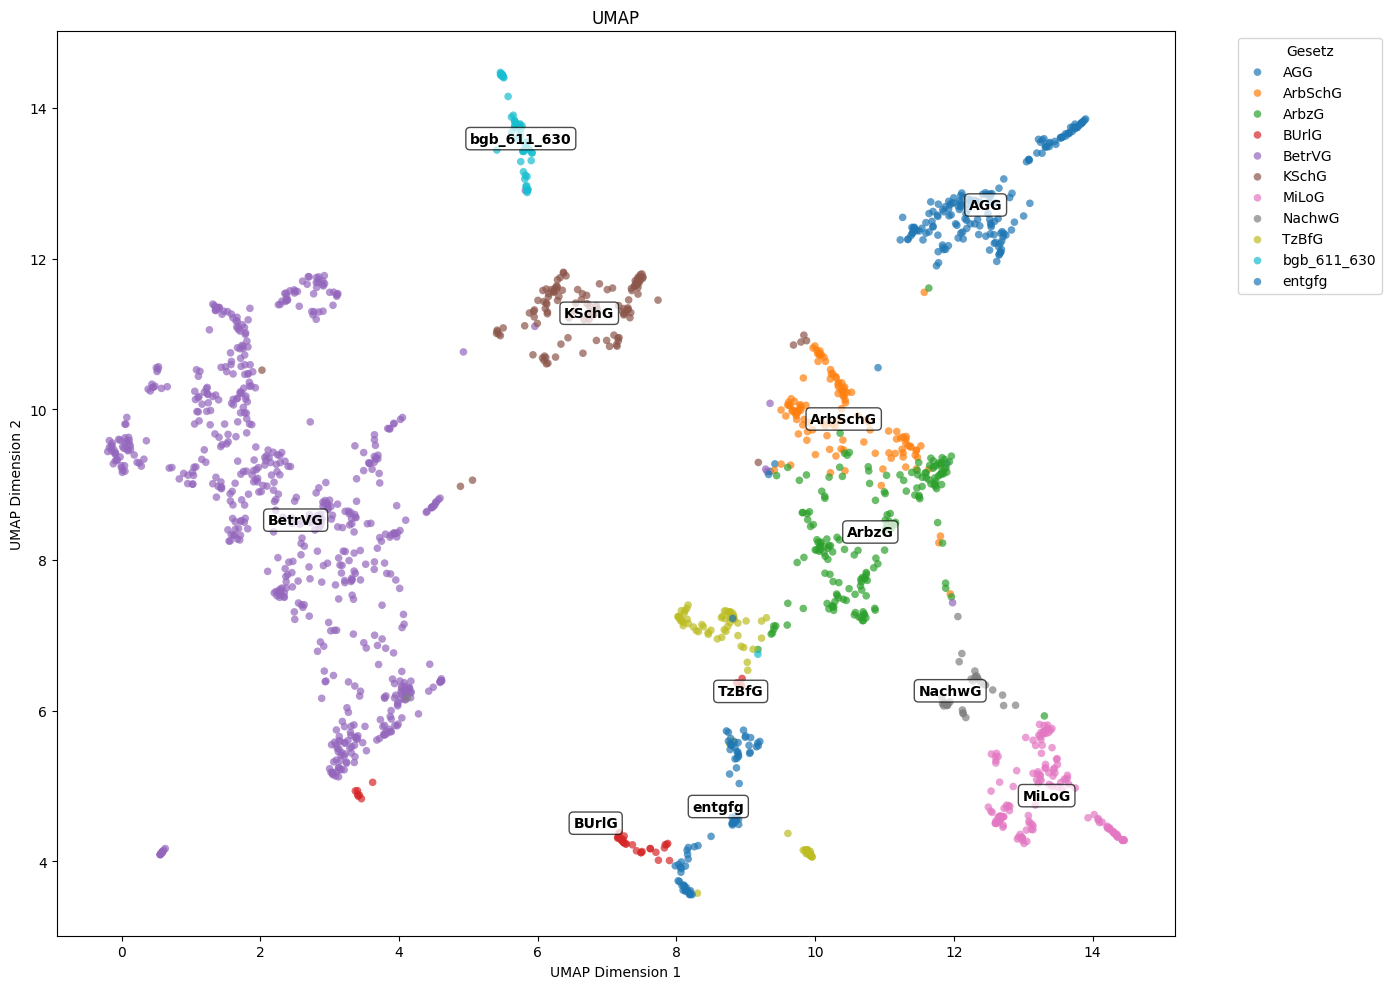

In [170]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#UMAP 
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_result = reducer.fit_transform(embeddings_matrix)

df2['umap_x'] = umap_result[:, 0]
df2['umap_y'] = umap_result[:, 1]

plt.figure(figsize=(14, 10))

groups = df2.groupby('gesetz')

for name, group in groups:
    plt.scatter(group['umap_x'], group['umap_y'], 
                label=name,       
                alpha=0.7, 
                s=30,
                edgecolors='none') 


for name, group in groups:
    center_x = group['umap_x'].mean()
    center_y = group['umap_y'].mean()
    
    plt.text(center_x, center_y, 
             name, 
             fontsize=10, 
             fontweight='bold', 
             horizontalalignment='center',
             verticalalignment='center',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7))

plt.title('UMAP')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.legend(title="Gesetz", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Zeigen das PCA nicht funktioniert, weil Strukturen nicht linear sind

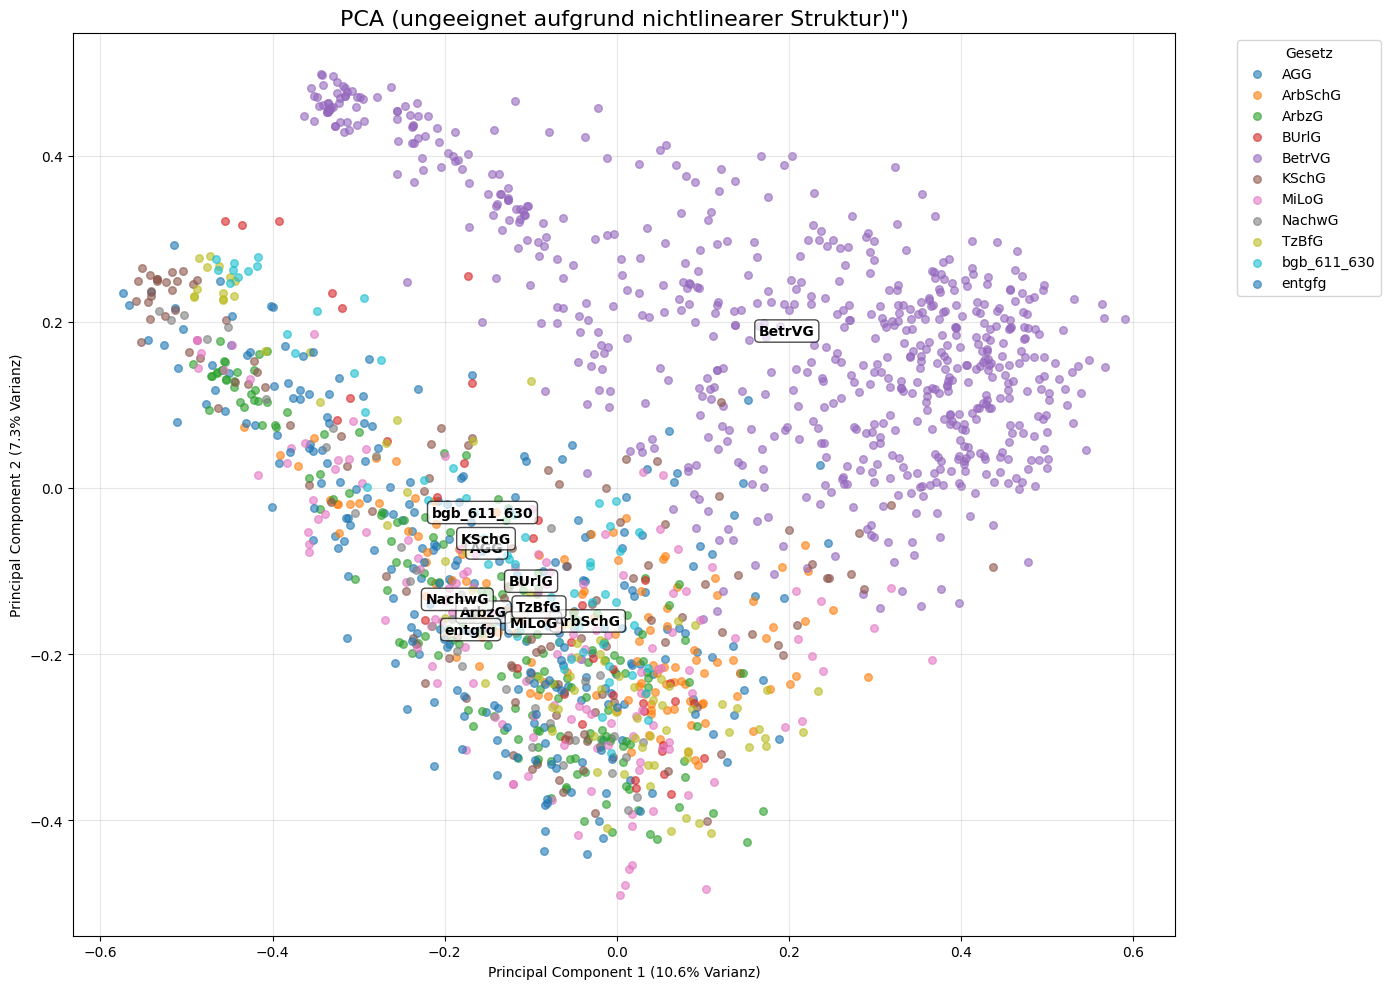

In [171]:


pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings_matrix)

df2['pca_x'] = pca_result[:, 0]
df2['pca_y'] = pca_result[:, 1]

plt.figure(figsize=(14, 10))

# Wir gruppieren nach dem Gesetz
groups = df2.groupby('gesetz')

for name, group in groups:
    plt.scatter(group['pca_x'], group['pca_y'], 
                label=name,       
                alpha=0.6, 
                s=30)

for name, group in groups:
    center_x = group['pca_x'].mean()
    center_y = group['pca_y'].mean()
    
    plt.text(center_x, center_y, 
             name, 
             fontsize=10, 
             fontweight='bold', 
             horizontalalignment='center',
             verticalalignment='center',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7))

var_explained = pca.explained_variance_ratio_
total_var = sum(var_explained) * 100

plt.title(f'PCA (ungeeignet aufgrund nichtlinearer Struktur)")', fontsize=16)
plt.xlabel(f'Principal Component 1 ({var_explained[0]:.1%} Varianz)')
plt.ylabel(f'Principal Component 2 ({var_explained[1]:.1%} Varianz)')

plt.legend(title="Gesetz", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [172]:
from dotenv import load_dotenv, dotenv_values
import os

load_dotenv("../key.env")
jinaai_api_key = os.getenv("JINAAI_API_KEY")

#print(os.getenv("JINAAI_API_KEY"))

In [173]:
from llama_index.embeddings.jinaai import JinaEmbedding
import pandas as pd
import chromadb


query_embed_model = JinaEmbedding(
    api_key=jinaai_api_key,
    model="jina-embeddings-v3",
    task="retrieval.query" 
)

In [174]:
query_embed_model = JinaEmbedding(
    api_key=jinaai_api_key,
    model="jina-embeddings-v3",
    task="retrieval.query" 
)





In [175]:
def search_law(query_text, top_k=5):
    """
    Sucht die ähnlichsten Gesetzes-Chunks zu einer Frage oder einem Text.
    Gibt einen DataFrame und die Vektoren zurück.
    """
    query_vector = query_embed_model.get_text_embedding(query_text)
    
    # 2. Suche in Chroma
    results = collection.query(
        query_embeddings=[query_vector],
        n_results=top_k,
        include=["metadatas", "documents", "distances"]
    )
    
    hits = []
    # Chroma gibt Listen in Listen zurück (Batch-Format)
    for i in range(len(results['ids'][0])):
        
        # Cosine Distance in Similarity umrechnen
        # Distanz von 0.1 => Ähnlichkeit von 0.9 (90%)
        dist = results['distances'][0][i]
        sim = 1 - dist
        
        meta = results['metadatas'][0][i]
        
        hits.append({
            'Score': sim,  # Zum Sortieren
            'Match': f"{sim:.1%}", # Für die Anzeige (z.B. 85.3%)
            'Gesetz': meta.get('gesetz', '?'),
            'Label': meta.get('label', 'Kein Label'),
            'Text': results['documents'][0][i]
        })
    
    return pd.DataFrame(hits)



In [176]:
from pprint import pprint
frage = "Wie viel Urlaubstage habe ich mindestens?"

df_result = search_law(frage, top_k=2)

print(f"Frage: {frage}\n")
# Wir zeigen nur die relevanten Spalten
pprint(df_result[['Match', 'Label', 'Text']].to_string(index=False))

Frage: Wie viel Urlaubstage habe ich mindestens?

('Match      '
 'Label                                                                                                                                                                                                                                                                                                                                                                                                                                         '
 'Text\n'
 '61.5% BUrlG § '
 '12                                                                                                                                                                                                                                                                                                                                                                              '
 'BUrlG § 12: Der Urlaub beträgt jährlich mindestens 24 Werktage.\n'
 '52.9% BUrlG § 12 BUrlG § 12: D

In [177]:
frage = "Was sind die Voraussetzungen für eine fristlose Kündigung?"

df_result = search_law(frage, top_k=2)

print(f"Frage: {frage}\n")
# Wir zeigen nur die relevanten Spalten
pprint(df_result[['Match', 'Label', 'Text']].to_string(index=False))

Frage: Was sind die Voraussetzungen für eine fristlose Kündigung?

('Match             '
 'Label                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      '
 'Text\n'
 '47.8% bgb_611_630 § 622 bgb_611_630 § 622: Für eine Kündigung durch den '
 'Arbeitgeber beträgt die Kündigungsfrist, wenn das Arbeitsverhältnis in dem '
 'Betrieb oder Unternehmen\\n1.\\nzwei Jahre bestanden hat, einen Monat zum

In [178]:
frage = "Welche Pflichten habe ich als Arbeitgeber bei Krankheit eines Mitarbeiters?"

df_result = search_law(frage, top_k=2)

print(f"Frage: {frage}\n")
# Wir zeigen nur die relevanten Spalten
pprint(df_result[['Match', 'Label', 'Text']].to_string(index=False))

Frage: Welche Pflichten habe ich als Arbeitgeber bei Krankheit eines Mitarbeiters?

('Match       '
 'Label                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 '
 'Text\n'
 '57.0% ArbSchG § 5 ArbSchG § 5: Unfälle in seinem Betrieb, bei denen ein '
 'Beschäftigter getötet oder so verletzt wird, daß er stirbt oder für mehr als '
 'drei Tage völlig oder teilweise arbeits- oder dienstunfähig wird, hat der '
 'Arbeitgeber zu erfassen.\\n\\nBei der Übertragung von Aufgaben auf '
 'Beschäftigte hat der Arbeitgeber je nach Art der Tätigkeiten